Epoch 1, Train Loss: 1.4496, Test Loss: 0.9729
Epoch 2, Train Loss: 0.8478, Test Loss: 0.7148
Epoch 3, Train Loss: 0.6819, Test Loss: 0.6082
Epoch 4, Train Loss: 0.6013, Test Loss: 0.5482
Epoch 5, Train Loss: 0.5522, Test Loss: 0.5091
Epoch 6, Train Loss: 0.5186, Test Loss: 0.4811
Epoch 7, Train Loss: 0.4939, Test Loss: 0.4602
Epoch 8, Train Loss: 0.4747, Test Loss: 0.4436
Epoch 9, Train Loss: 0.4593, Test Loss: 0.4302
Epoch 10, Train Loss: 0.4466, Test Loss: 0.4187
Epoch 11, Train Loss: 0.4358, Test Loss: 0.4092
Epoch 12, Train Loss: 0.4266, Test Loss: 0.4012
Epoch 13, Train Loss: 0.4186, Test Loss: 0.3937
Epoch 14, Train Loss: 0.4115, Test Loss: 0.3876
Epoch 15, Train Loss: 0.4052, Test Loss: 0.3817
Epoch 16, Train Loss: 0.3996, Test Loss: 0.3768
Epoch 17, Train Loss: 0.3944, Test Loss: 0.3722
Epoch 18, Train Loss: 0.3898, Test Loss: 0.3680
Epoch 19, Train Loss: 0.3856, Test Loss: 0.3641
Epoch 20, Train Loss: 0.3816, Test Loss: 0.3607
Epoch 21, Train Loss: 0.3780, Test Loss: 0.3572
E

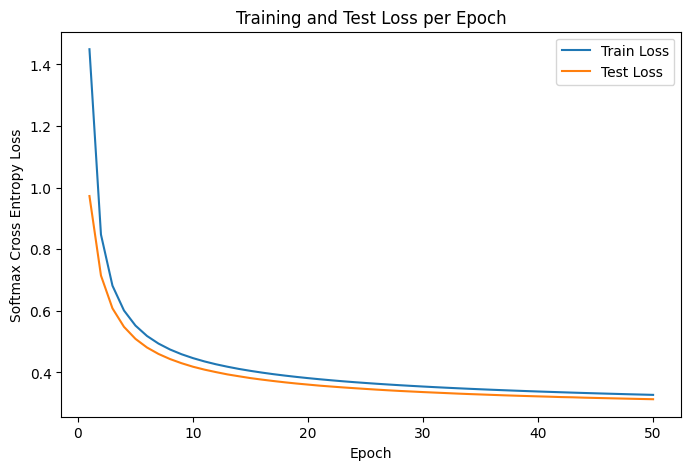

Final Test Accuracy: 0.9145


In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

mnist_train_images = mnist_train_images.reshape(-1, 784).astype('float32') / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 784).astype('float32') / 255.0

mnist_train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)
mnist_test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

# Hyperparameters
training_epochs = 50
batch_size = 1000
learning_rate = 0.05

# Initialize weights and biases
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Prepare training dataset batches
train_dataset = tf.data.Dataset.from_tensor_slices((mnist_train_images, mnist_train_labels))
train_dataset = train_dataset.shuffle(buffer_size=60000).batch(batch_size)

# Training step function
@tf.function
def train_step(x, y_true):
    with tf.GradientTape() as tape:
        logits = tf.matmul(x, W) + b
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits))
    grads = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(grads, [W, b]))
    return loss

# Evaluate loss function
def evaluate_loss(x, y_true):
    logits = tf.matmul(x, W) + b
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits))
    return loss.numpy()

# Evaluate accuracy function
def evaluate_accuracy(x, y_true):
    logits = tf.matmul(x, W) + b
    predictions = tf.argmax(logits, axis=1)
    labels = tf.argmax(y_true, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))
    return accuracy.numpy()

# Lists to store loss values for plotting
train_losses = []
test_losses = []
epochs_list = []

# Training loop
for epoch in range(1, training_epochs + 1):
    train_loss_avg = 0.0
    batches = 0
    
    for batch_xs, batch_ys in train_dataset:
        loss = train_step(batch_xs, batch_ys)
        train_loss_avg += loss.numpy()
        batches += 1
    train_loss_avg /= batches
    
    test_loss = evaluate_loss(mnist_test_images, mnist_test_labels)
    
    epochs_list.append(epoch)
    train_losses.append(train_loss_avg)
    test_losses.append(test_loss)
    
    print(f"Epoch {epoch}, Train Loss: {train_loss_avg:.4f}, Test Loss: {test_loss:.4f}")

# Plot losses after training
plt.figure(figsize=(8,5))
plt.plot(epochs_list, train_losses, label='Train Loss')
plt.plot(epochs_list, test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Softmax Cross Entropy Loss')
plt.title('Training and Test Loss per Epoch')
plt.legend()
plt.show()

# Print final accuracy on test set
test_acc = evaluate_accuracy(mnist_test_images, mnist_test_labels)
print(f"Final Test Accuracy: {test_acc:.4f}")
